<font size="6" color="red">ch3. 분류분석</font>
# 1절. 분류분석 개요
- skikit-learn 공식 사이트 : http://scikit-learn.org
- skikit-learn 도큐먼트 : http://scikit-learn.org/stable
```
    pip install scikit-learn
```

## tensorflow(DL) 또는 skikit-learn(ML) 샘플용 데이터 셋 접근 방법
### load 계열
- 패키지 내 데이터를 가지고 있음
### fetch 계열
- 패키지 가 데이터를 가지고 있지 않고 함수 호출시 인터넷 다운
### make 계열
- make_classification() : 분류분석용 데이터 생성
- make_regression() : 회귀분석용 데이터 생성

In [1]:
# load 계열
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
(X_train, y_train),(X_test, y_test) = mnist.load_data()

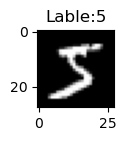

In [2]:
plt.figure(figsize=(1,1))
plt.imshow(X_train[0], cmap='gray')
plt.title(f'Lable:{y_train[0]}')
plt.show()

In [3]:
# fetch 계열
from sklearn.datasets import fetch_openml # iris, mnist, wine, fashion-MNIST
import numpy as np
mnist = fetch_openml(name='mnist_784', parser='auto', version=1, as_frame=False)
mnist.data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# 2절 분류분석의 종류
## 2-1 확률적 모형(모델)
- 주어진 데이터에 대해 각 클래스(그룹) 가 정답일 조건부 확률을 계산하는 모형
- 함수 : predict(값), predict_proba() - 각분류 클래스별 확률, predict_log_proba() - 확률의로그값

### 1) 확률적 생성 모형
- 베이즈 정리를 사용한 확률적 생성 모형
```
    ex)  sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis(이차판별분석 모형)
        sklearn.naive_bayes.MultinomialNB(나이브 베이지안)
```
### 2) 확률적 판별모형
- 조건부 확률 함수를 추정하는 확률적 판별 모형
```
    ex) sklearn.linear_model.LogisticRegression(로지스틱 회귀분석)
       sklearn.tree.DecisionTreeClassifier(의사결정나무)
```
## 2-2 판별함수 모형
- 주어진 데이터를 클래스에 따라 서로 다른 영역으로 나누는 경계면을 찾은 후 이 경계면으로부터 주어진 데이터가 어느 위치에 있는지 계산
- 함수 : predict(값), decision_function(값)-어떤 클래스로 분류 되는 정도

```
    ex) sklearn.linear_model.Perceptron(신경망)
       sklearn.svm.SVC(서포트 벡터 머신)
       sklearn.neural_network.MLPClassifier(다중신경망)
```

=> RandomForest, XGBoost, LGBM, CatBoost등의 앙상블 모형이 더 많이 사용

# 3절. 분류분석 모형1. 확률적 생성 모형
## 3-1. QDA(Quadratic Discriminant Analysis) : 이차 판별 분석법
- 독립변수 실수이고 다변수 정규분포 라고 가정(pt. 11~12)

In [4]:
# 샘플데이터 생성
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, # 독립변수 갯수
                           n_informative=2, # 종속변수에 영향을 미치는 독립변수 갯수
                           n_redundant=0, # 독립변수 중 독립변수 끼리 선형관계가 있는 수
                           n_classes=2, # 종속변수의 클래스 수
                           n_clusters_per_class=1, # 클래스 당 군의 갯수
                           random_state=9 # random seed 값
                          )
X.shape, y.shape

((100, 2), (100,))

In [5]:
import pandas as pd
import numpy as np
print(pd.Series(y).unique())
print(np.unique(y))

[0 1]
[0 1]


In [6]:
X0 = X[y==0] # 0인 그룹의 독립변수
X1 = X[y==1] # 1인 그룹의 독립변수

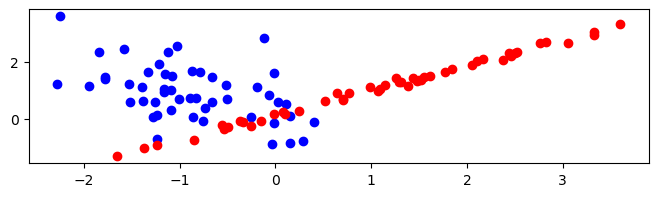

In [7]:
plt.figure(figsize=(8,2))
plt.scatter(X0[:,0],
            X0[:,1],
            c='b')
plt.scatter(X1[:,0],
            X1[:,1],
            c='r')

In [8]:
len(X0), len(X1)

(50, 50)

In [9]:
# 대칭구조를 만들기
X[y==1] = -X[y==0]

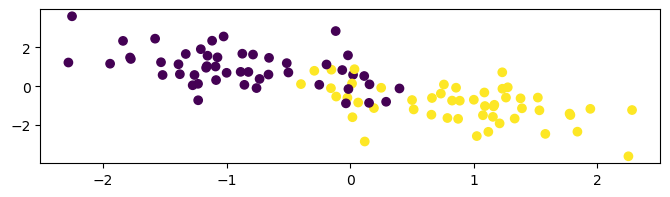

In [10]:
plt.figure(figsize=(8,2))
plt.scatter(X[:,0],
            X[:,1],
            c=y)

In [11]:
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
model.fit(X, y)

QuadraticDiscriminantAnalysis()

In [12]:
x = [[5,5]]
model.predict(x)

array([1])

In [13]:
model.predict_proba(x)

array([[8.84215536e-06, 9.99991158e-01]])

In [14]:
model.predict_log_proba(x)

array([[-1.16359799e+01, -8.84219445e-06]])

In [15]:
model.classes_

array([0, 1])

In [16]:
model.score(X, y)

0.88

In [17]:
y_hat = model.predict(X)
pd.crosstab(y, y_hat, colnames=['예측'], rownames=['실제'])

예측,0,1
실제,,
0,44,6
1,6,44


[[0.94904465 0.05095535]]


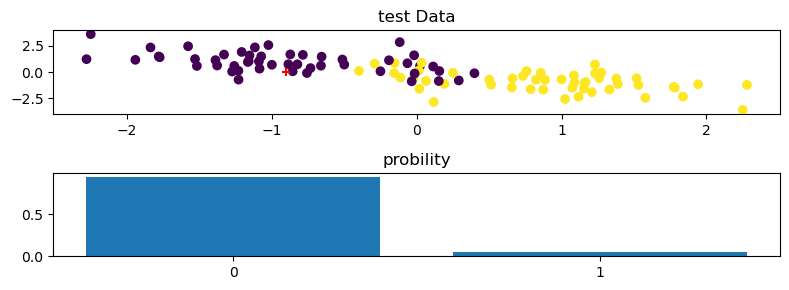

In [18]:
plt.figure(figsize=(8,3))
x = [[-0.9,0]]
p = model.predict_proba(x)
print(p)
plt.subplot(211)
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(x[0][0], x[0][1], c='r', marker='+')
plt.title('test Data')
plt.subplot(212)
plt.bar(model.classes_, p[0])
plt.xticks(model.classes_)
plt.title('probility')
plt.tight_layout()
plt.show()

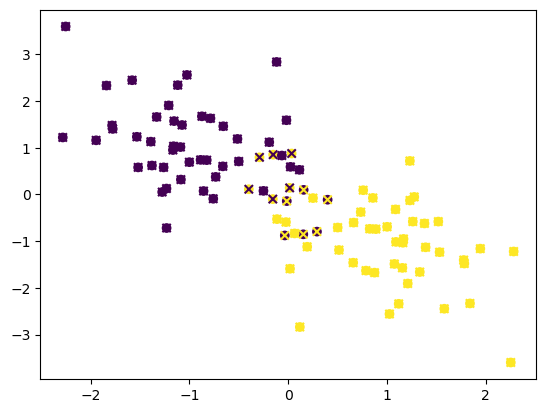

In [19]:
y_hat = model.predict(X)
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(X[:,0], X[:,1], c=y_hat, marker='x')
plt.show()

## 3-2 나이브 베이지안 모형

In [20]:
import seaborn as sns
iris = sns.load_dataset('iris')
X = iris.iloc[:, :-1]
y = iris.species

from sklearn.naive_bayes import MultinomialNB, GaussianNB
model = MultinomialNB().fit(X.values, y)

print(X.shape, y.shape, type(X), type(y))

(150, 4) (150,) <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [21]:
test_X = [[5.1, 3.5, 1.4, 0.2]]
print(model.predict(test_X))
print(model.classes_)
print(model.predict_proba(test_X))

['setosa']
['setosa' 'versicolor' 'virginica']
[[0.75199536 0.16092948 0.08707516]]


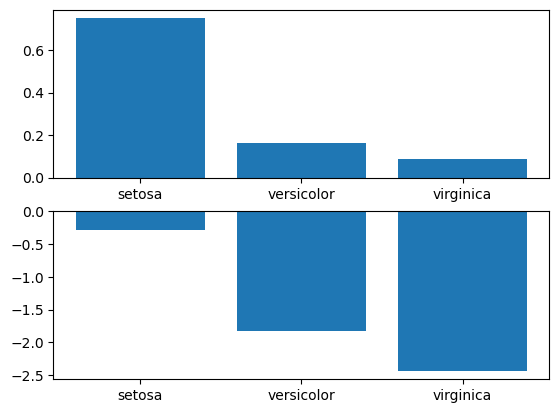

In [22]:
plt.subplot(211)
plt.bar(model.classes_, model.predict_proba(test_X)[0])
plt.subplot(212)
plt.bar(model.classes_, model.predict_log_proba(test_X)[0])
plt.show()

# 4절. 분류분석모형2. 확률적 판별모형
## 4-1 로지스틱 회귀분석
- 종속변수가 이항분포

In [23]:
X, y = make_classification(n_samples=100,
                           n_features=1, # 독립변수 수
                           n_redundant=0, # 종속변수에 영향을 미치지 않는 독립변수 수
                           n_informative=1, # 종속변수에 영향을 미치는 독립변수 수
                           n_clusters_per_class=1, # 클래스당 서브 클래스 수
                           n_classes=2,
                           random_state=1)
X.shape, y.shape

((100, 1), (100,))

In [24]:
np.unique(y), np.mean(y)

(array([0, 1]), 0.5)

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X, y)

In [26]:
xx = np.linspace(-3, 3, 100)
# xx 값을 predict하기 위해 축추가 : [[-3], [-2.93], ...]
XX = xx.reshape(-1, 1)
XX = xx[:, None]
XX = np.expand_dims(xx, axis=1)
XX = xx[:, np.newaxis]
print('축 증가 결과 shape :', XX.shape)
prob = model.predict_proba(XX) # 각 변수의 0 확률, 1 확률

축 증가 결과 shape : (100, 1)


In [27]:
prob0 = prob[:, 0] # 각 변수의 0일 확률
prob1 = prob[:, 1] # 각 변수의 1일 확률

[0.73082662 0.26917338]


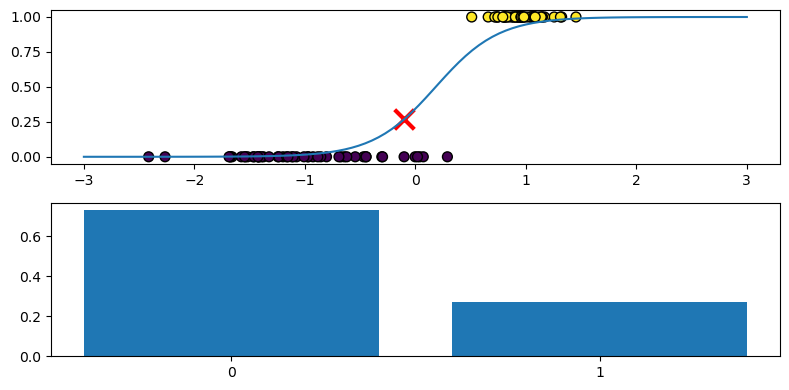

In [28]:
test_x = [[-0.1]]
prob_x = model.predict_proba(test_x)
print(prob_x[0])

plt.figure(figsize=(8,4))
plt.subplot(211)
plt.plot(xx, prob1)
plt.scatter(test_x[0], prob_x[0][1], c='r', marker='x', s=200, lw=3)
plt.scatter(X, y, c=y, s=50, edgecolors='k')
plt.subplot(212)
plt.bar(model.classes_, prob_x[0])
plt.xticks(model.classes_)
plt.tight_layout()
plt.show()

## 4-2 의사결정나무
- 분류와 회귀에 모두 사용될 수 있으므로 CART(classification Andd Regression Tree) 라고도 함
- ★ 종속변수에 영향을 주는 독립변수의 범주를 찾는데 목적

In [29]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target_names[iris.target]
feature_names = [name[:-5] for name in iris.feature_names[2:]]

In [30]:
from sklearn.tree import DecisionTreeClassifier
df_model = DecisionTreeClassifier(criterion='entropy',
                                  max_depth=1,
                                  random_state=0).fit(X, y)

In [31]:
test_X = [[1.4, 0.2]]
print(df_model.predict(test_X))
print(df_model.predict_proba(test_X))

['setosa']
[[1. 0. 0.]]


In [32]:
import io
# conda install graphviz
# pip install pydot
from sklearn.tree import export_graphviz
import pydot
from IPython.core.display import Image
def draw_decision_tree(model, feature_names):
    dot_buf = io.StringIO() # 메모리 버퍼 생성
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)

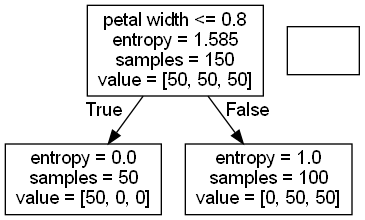

In [33]:
draw_decision_tree(df_model, feature_names=feature_names)

In [38]:
data = load_iris()
X = data.data[:,2:]
y = data.target
feature_names = [name[:-5] for name in data.feature_names[2:]]
dt_model = DecisionTreeClassifier(criterion='entropy', # 분류품질기준
                                  max_depth=1,
                                  random_state=0).fit(X,y)

In [39]:
import matplotlib as mpl
import matplotlib.pylab as plt

def plot_decision_regions(X, y, model, title):
    species = ['setosa', 'versicolor', 'virginica']
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution))
    
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
            c=[cmap(idx)], marker=markers[idx], s=80, label=species[cl])
        
    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    
    return Z

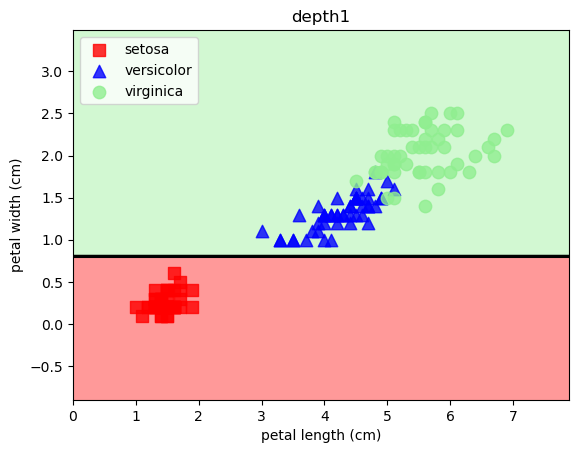

In [40]:
plot_decision_regions(X, y, dt_model, 'depth1')
plt.show()

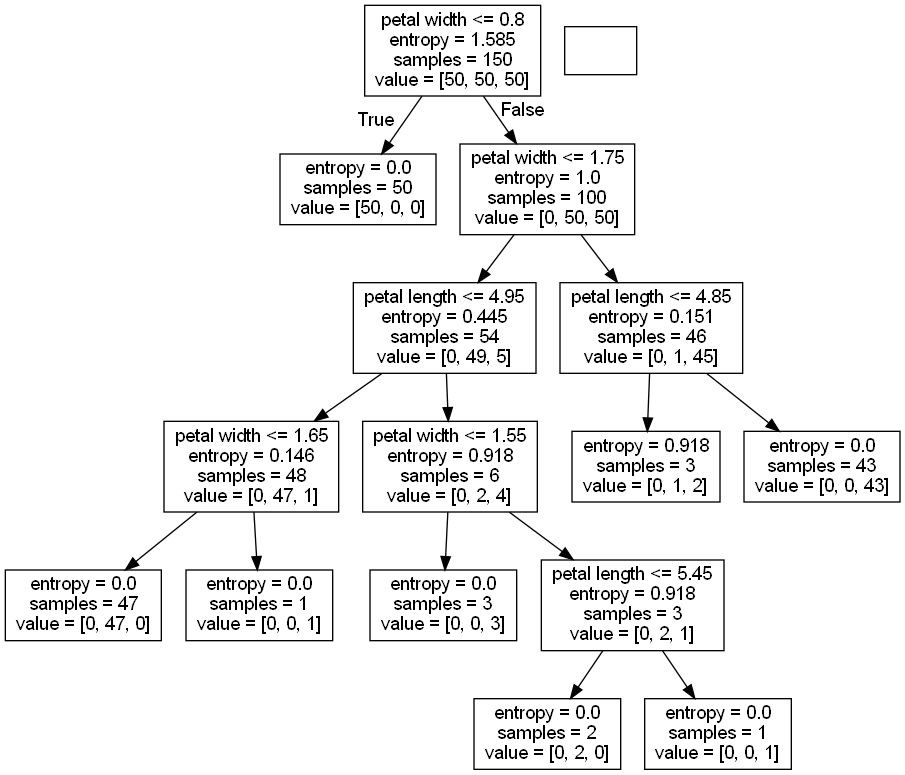

In [42]:
dt_model5 = DecisionTreeClassifier(criterion='entropy',
                                   max_depth=5,
                                   random_state=0).fit(X, y)
draw_decision_tree(dt_model5, feature_names)

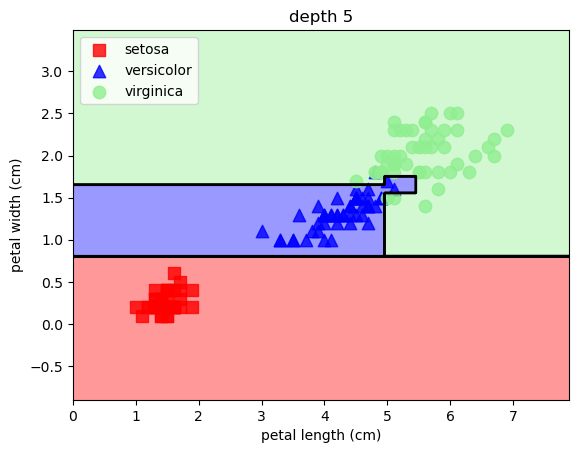

In [43]:
plot_decision_regions(X, y, dt_model5, 'depth 5')
plt.show()

# 5절. 분류분석모형3. 판별함수 모형
- predict(), decision_funtcion()
## 5-1 Perceptron

In [44]:
iris = load_iris()
idx = (iris.target==0) | (iris.target==2)
idx = np.in1d(iris.target, [0, 2])
idx

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [45]:
X = iris.data[idx, 0:2]
y = iris.target[idx]
X.shape, y.shape

((100, 2), (100,))

In [46]:
from sklearn.linear_model import Perceptron
model = Perceptron(max_iter=100,
                   eta0=0.1,
                   random_state=1).fit(X, y)

In [47]:
y_hat = model.predict(X)
pd.crosstab(y, y_hat)

col_0,0,2
row_0,,
0,49,1
2,0,50


In [48]:
for idx, (real, hat) in enumerate(zip(y, y_hat)):
    if real != hat:
        print(f"{idx} {real} {hat} {X[idx]}")

41 0 2 [4.5 2.3]


In [50]:
test_X = X[41].reshape(1, -1)
test_X = X[41][np.newaxis, :]
test_X = X[41][None, :]
test_X = np.expand_dims(X[41], axis=0)
test_X

array([[4.5, 2.3]])

## 5-2 SVC

In [ ]:
from sklearn.svm import SVC
model = SVC().fit(X, y)

## 5-3 다중퍼셉트론(인공신경망)

In [51]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 50, 30),
                          max_iter=500).fit(X, y)

In [52]:
pred = mlp_model.predict(X)
pd.crosstab(y, pred)

col_0,0,2
row_0,,
0,50,0
2,0,50


# 6절. 분류모형 성능평가
## 6-1 scikit-learn의 모형평가 방법
- 예측모형.score()
    * 분류의 경우 accuracy. 회귀의 경우 r제곱(설명력)
- metrics 패키지 함수
    * 분류 , 회귀, 군집 모형의 평가를 위한 다양한 함수 제공
- scoring 매개변수 및 GridSearchCV 클래스 이용

In [53]:
y_true = [1, 1, 0, 0, 2, 1, 0, 2, 2] # 실제값
y_pred = [1, 1, 0, 1, 1, 0, 0, 2, 2] # 예측값
pd.crosstab(y_true, y_pred)

col_0,0,1,2
row_0,,,
0,2,1,0
1,1,2,0
2,0,1,2


In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[2, 1, 0],
       [1, 2, 0],
       [0, 1, 2]], dtype=int64)

# 6-2 혼돈행렬 을 이용한 평가
- accuracy, recall, precision, Specificity, f1 score, fbeta score,

In [55]:
result = pd.read_csv('model_result.csv')
result

,CUST_ID,y_true,y_pred
0,37,0,0
1,51,0,0
2,60,0,0
3,65,0,0
4,73,0,0
...,...,...,...
1788,22320,0,0
1789,22328,1,0
1790,22329,0,0
1791,22342,0,0
